In [2]:
from py2neo import *


In [3]:
authenticate("localhost:7474","neo4j","pxyon123")

graph = Graph()

In [23]:
res = graph.data("""
MATCH (c:CAlpha {IdPDB:'5O75'})-[r:NEAR_10A]-(d) 
WHERE r.Dist<=5 
return id(c) as c,id(r) as r,id(d) as d limit 10
""")
res


[{'c': 9203, 'd': 9204, 'r': 47013},
 {'c': 9203, 'd': 9240, 'r': 47021},
 {'c': 9203, 'd': 9202, 'r': 47003},
 {'c': 9186, 'd': 9185, 'r': 46927},
 {'c': 9186, 'd': 9187, 'r': 46929},
 {'c': 9228, 'd': 9229, 'r': 47132},
 {'c': 9228, 'd': 9227, 'r': 47128},
 {'c': 9245, 'd': 9244, 'r': 47174},
 {'c': 9245, 'd': 9246, 'r': 47178},
 {'c': 9234, 'd': 9233, 'r': 47142}]

In [15]:
import networkx as nx


In [16]:
g = nx.Graph()

In [29]:
res = graph.data("""
MATCH (c:CAlpha {IdPDB:'5O75'})-[r:NEAR_10A]-(d) 
WHERE r.Dist<=5 
return id(c) as c, id(r) as r, id(d) as d, r.Dist as dist  
LIMIT 4
""")
res


[{'c': 9203, 'd': 9204, 'dist': 3.7947255500233488, 'r': 47013},
 {'c': 9203, 'd': 9240, 'dist': 4.641224407416647, 'r': 47021},
 {'c': 9203, 'd': 9202, 'dist': 3.799291512900795, 'r': 47003},
 {'c': 9186, 'd': 9185, 'dist': 3.8061417472290784, 'r': 46927}]

In [14]:
import py2neo as pn

In [18]:
graph.node(8045)

(befd7c0:CAlpha {AtomSerial:10,Coords:[26.857,49.58,93.081],IdPDB:"5O75",ResName:"ALA",ResSeq:1099})

In [17]:
type(graph.node(6817))

py2neo.types.Node

In [28]:
type(res[0])

dict

In [37]:
res[0]['c']

9203

In [39]:
nodec = graph.node( res[0]['c'] )
nodec

(cc33712:CAlpha {AtomSerial:145,Coords:[11.533,43.199,86.29],IdPDB:"5O75",ResName:"VAL",ResSeq:1116})

In [43]:
rel1 = graph.relationship( res[0]['r'] )
rel1

(cc33712)-[:NEAR_10A {Dist:3.7947255500233488}]->(bbe870e)

In [44]:
rel1['Dist']

3.7947255500233488

In [21]:
graph.data("MATCH (c:CAlpha {IdPDB:'5O75'})-[r:NEAR_10A]-(d) WHERE r.Dist<=5 return id(c), id(r),id(d) limit 4")


[{'id(c)': 6817, 'id(d)': 6818, 'id(r)': 32340},
 {'id(c)': 6818, 'id(d)': 6817, 'id(r)': 32340},
 {'id(c)': 6818, 'id(d)': 6819, 'id(r)': 32342},
 {'id(c)': 6819, 'id(d)': 6818, 'id(r)': 32342}]

In [22]:
c1 = graph.node(6817)

In [23]:
c2 = graph.node(6818)

In [24]:
c2 = graph.node(6819)

In [25]:
r1 = graph.relationship(32340)

In [26]:
r1 = graph.relationship(32342)

In [27]:
r1

(efba878)-[:NEAR_10A {Dist:3.818972767643153}]->(ee1b5b7)

In [30]:
type(r1)

py2neo.types.Relationship

In [31]:
dict(r1)

{'Dist': 3.818972767643153}

In [32]:
len(r1)

1

In [34]:
r1['Dist']

3.818972767643153

In [35]:
g.add_edge(c1, c2, Dist=r1['Dist'] )

In [36]:
g.nodes()

NodeView(((ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}), (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100})))

In [37]:
g.edges()

EdgeView([((ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}), (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100}))])

In [39]:
g.add_edge(c1, c2, weight=r1['Dist'])

In [40]:
g.edges()

EdgeView([((ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}), (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100}))])

In [44]:
nx.get_edge_attributes(g,'weight')

{((ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}),
  (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100})): 3.818972767643153}

In [42]:
type(r1['Dist'])

float

In [43]:
g.edges.data('weight')

EdgeDataView([((ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}), (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100}), 3.818972767643153)])

In [45]:
g[c1][c2]['weight']

3.818972767643153

In [46]:
g[c1]

AtlasView({(ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100}): {'Dist': 3.818972767643153, 'weight': 3.818972767643153}})

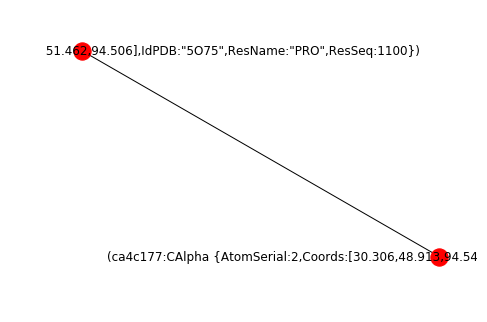

In [55]:
nx.draw(g, with_labels=True)

In [50]:
gex=nx.Graph()


In [52]:
gex.add_nodes_from(range(100, 110))

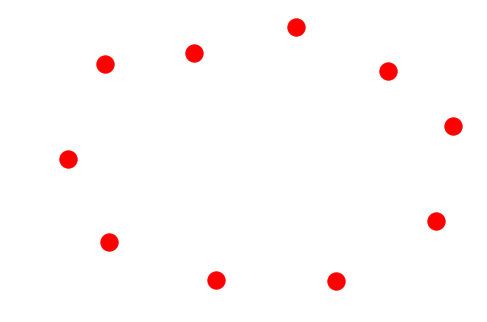

In [53]:
nx.draw(gex)

In [19]:
g.edges(data=True)

EdgeDataView([])

In [58]:
labels = {}
for n in g.nodes():
	labels[n] = n['ResSeq']

In [59]:
labels

{(ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}): 1098,
 (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100}): 1100}

In [69]:
pos = nx.circular_layout(g)

{(ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}): Text(1,4.37114e-08,'1098'),
 (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100}): Text(-1,-4.37114e-08,'1100')}

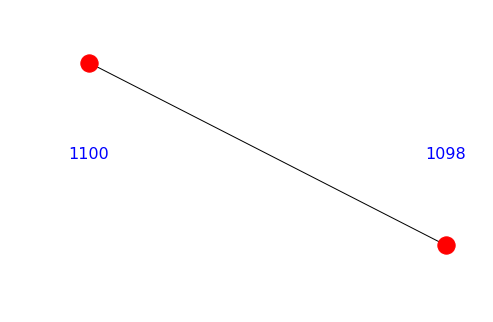

In [70]:
nx.draw(g)
nx.draw_networkx_labels(g,pos,labels,font_size=16,font_color='b')

In [62]:
pos

{(ca4c177:CAlpha {AtomSerial:2,Coords:[30.306,48.913,94.546],IdPDB:"5O75",ResName:"ASP",ResSeq:1098}): array([-1.        ,  0.63958321]),
 (ee1b5b7:CAlpha {AtomSerial:15,Coords:[23.855,51.462,94.506],IdPDB:"5O75",ResName:"PRO",ResSeq:1100}): array([ 1.        , -0.63958321])}